In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance
from xgboost import to_graphviz
from xgboost import XGBRegressor

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("College.csv")

In [3]:
df

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        777 non-null    object 
 1   Private     777 non-null    object 
 2   Apps        777 non-null    int64  
 3   Accept      777 non-null    int64  
 4   Enroll      777 non-null    int64  
 5   Top10perc   777 non-null    int64  
 6   Top25perc   777 non-null    int64  
 7   FUndergrad  777 non-null    int64  
 8   PUndergrad  777 non-null    int64  
 9   Outstate    777 non-null    int64  
 10  RoomBoard   777 non-null    int64  
 11  Books       777 non-null    int64  
 12  Personal    777 non-null    int64  
 13  PhD         777 non-null    int64  
 14  Terminal    777 non-null    int64  
 15  SFRatio     777 non-null    float64
 16  percalumni  777 non-null    int64  
 17  Expend      777 non-null    int64  
 18  GradRate    777 non-null    int64  
dtypes: float64(1), int64(16), obj

In [5]:
df.shape

(777, 19)

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [7]:
df = df.drop(['Name','Private'],axis=1)

In [8]:
df

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [9]:
df.isnull().sum()

Apps          0
Accept        0
Enroll        0
Top10perc     0
Top25perc     0
FUndergrad    0
PUndergrad    0
Outstate      0
RoomBoard     0
Books         0
Personal      0
PhD           0
Terminal      0
SFRatio       0
percalumni    0
Expend        0
GradRate      0
dtype: int64

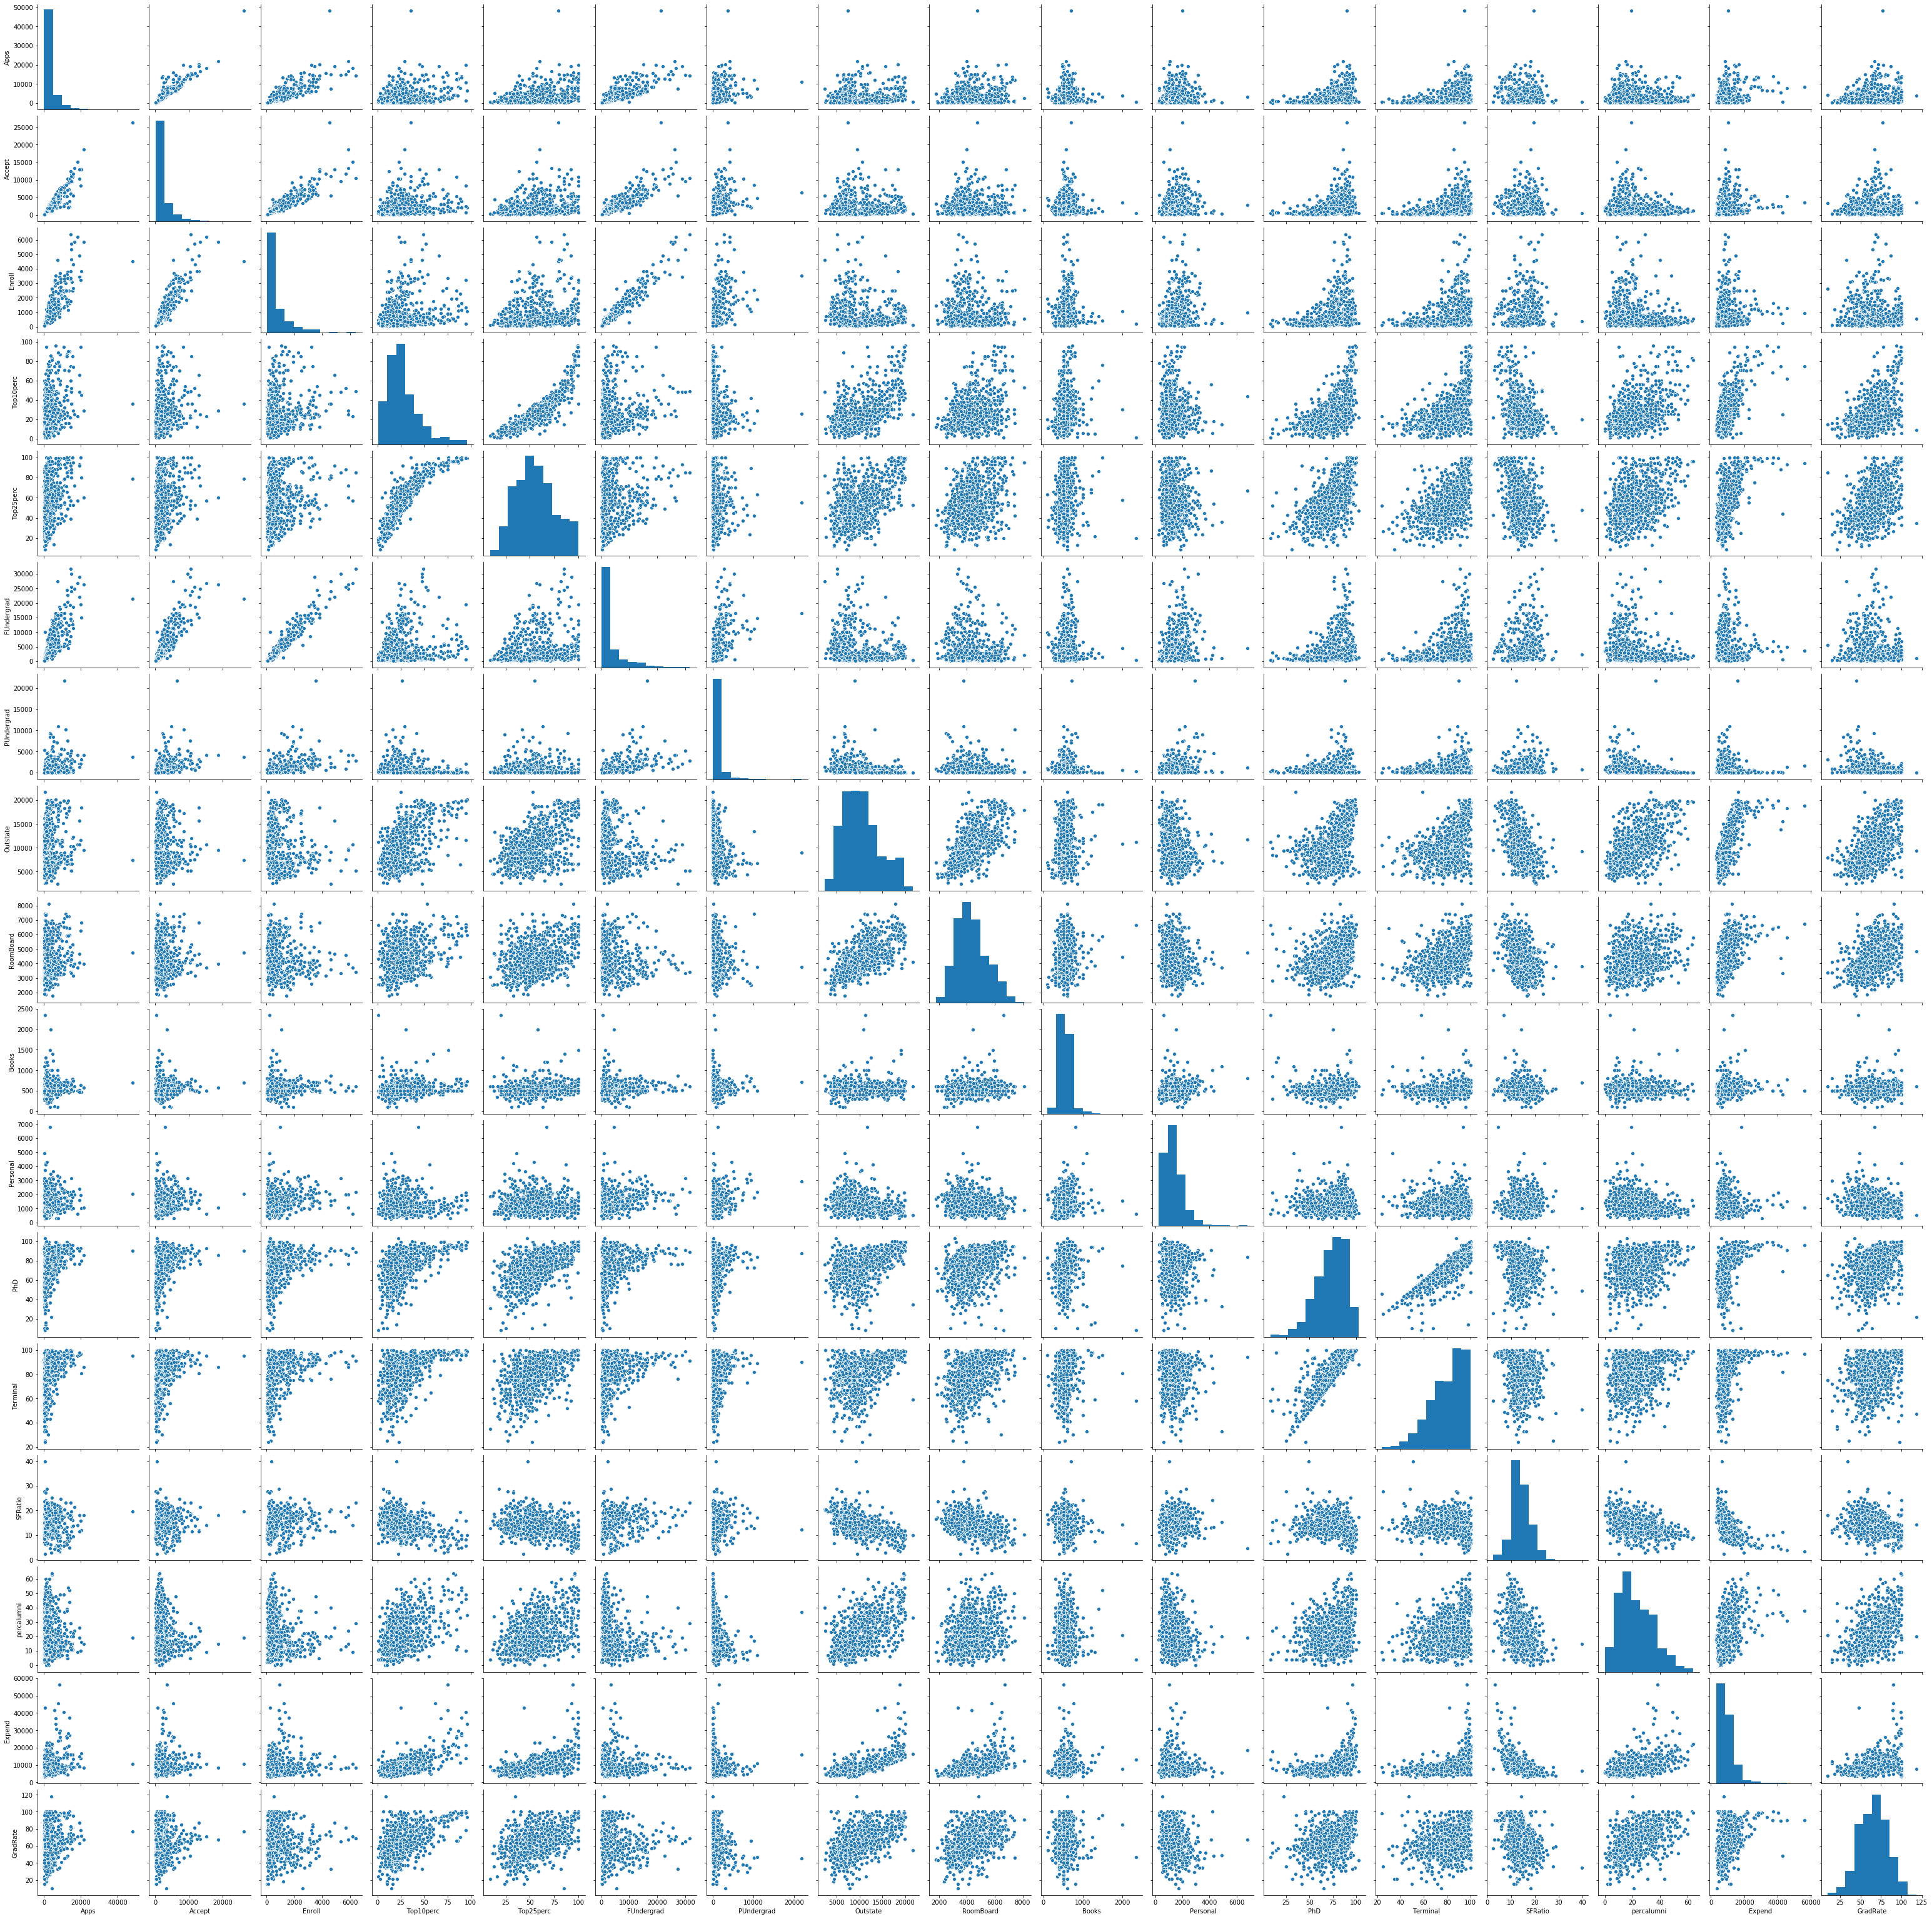

In [10]:
sns.pairplot(df)
plt.show()

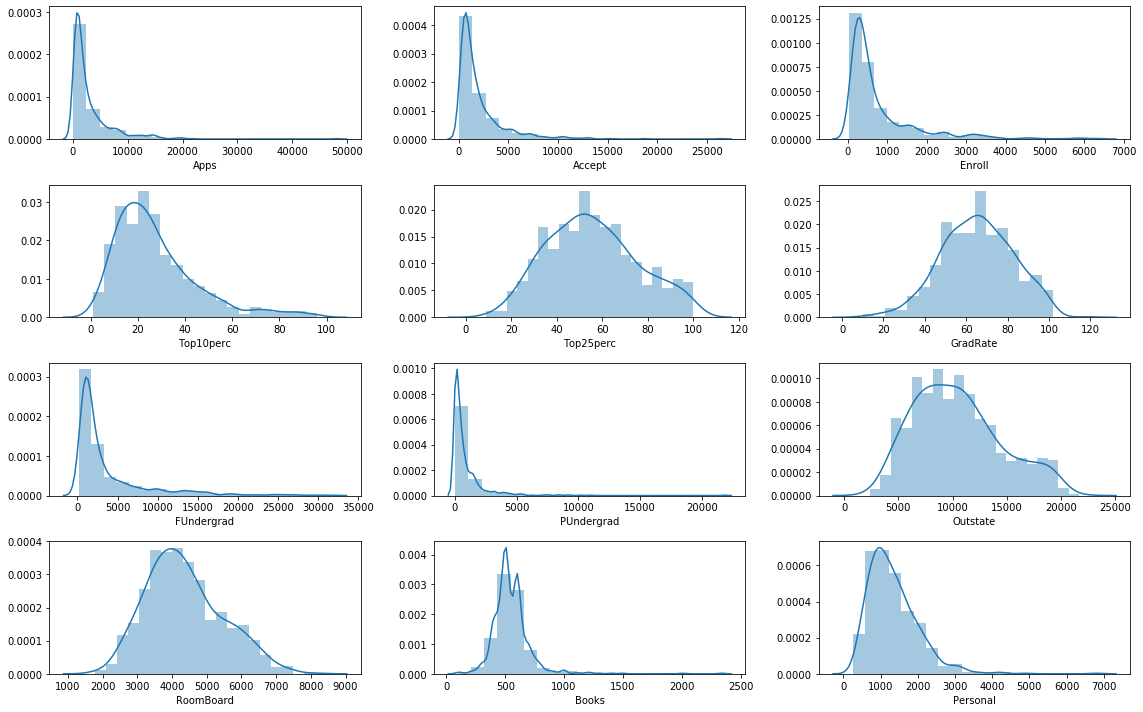

In [11]:
plt.figure(figsize=(16,10))
plt.subplot(4,3,1)
sns.distplot(a=df.Apps,bins=20)
plt.subplot(4,3,2)
sns.distplot(a=df.Accept,bins=20)
plt.subplot(4,3,3)
sns.distplot(a=df.Enroll,bins=20)

plt.subplot(4,3,4)
sns.distplot(a=df.Top10perc,bins=20)
plt.subplot(4,3,5)
sns.distplot(a=df.Top25perc,bins=20)
plt.subplot(4,3,6)
sns.distplot(a=df.GradRate,bins=20)

plt.subplot(4,3,7)
sns.distplot(a=df.FUndergrad,bins=20)
plt.subplot(4,3,8)
sns.distplot(a=df.PUndergrad,bins=20)
plt.subplot(4,3,9)
sns.distplot(a=df.Outstate,bins=20)

plt.subplot(4,3,10)
sns.distplot(a=df.RoomBoard,bins=20)
plt.subplot(4,3,11)
sns.distplot(a=df.Books,bins=20)
plt.subplot(4,3,12)
sns.distplot(a=df.Personal,bins=20)

plt.tight_layout()

In [12]:
df.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
FUndergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
PUndergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
RoomBoard,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


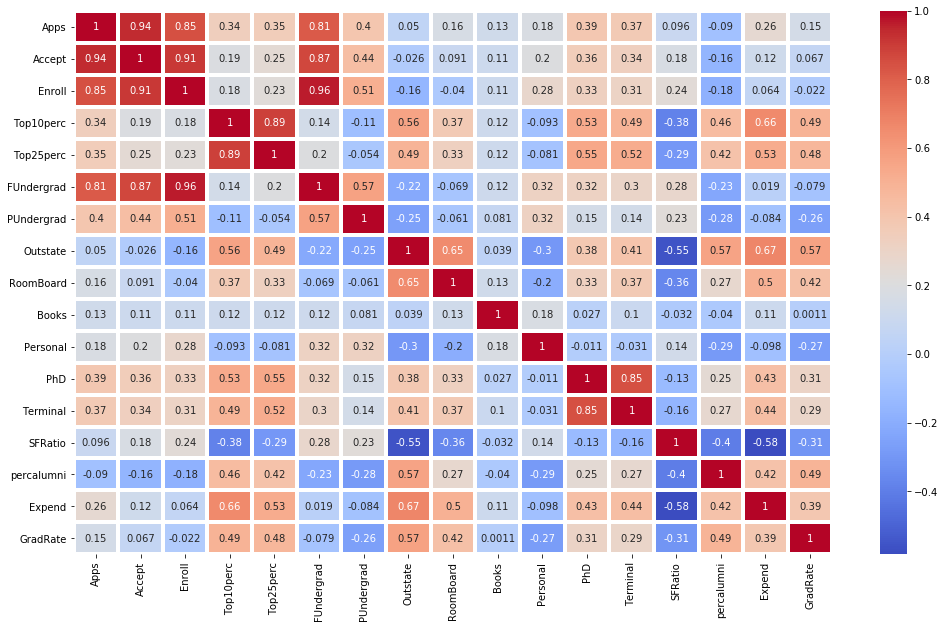

In [13]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2g',linewidths=3)
plt.show()

In [14]:
X = df.iloc[:,0:16]
y = df.iloc[:,16]

In [15]:
scalar = StandardScaler()

In [16]:
X_scaled = scalar.fit_transform(X)

In [17]:
X_scaled

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
         1.01377594e+00, -8.67574189e-01, -5.01910084e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -4.77704499e-01, -5.44572203e-01,  1.66109850e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
        -3.00749192e-01,  5.85934748e-01, -1.77289956e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
         7.84407510e-02, -2.21570217e-01, -2.56241250e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
        -2.09558159e+00,  2.12019418e+00,  5.88797079e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         1.01377594e+00,  4.24433755e-01, -9.87115613e-01]])

In [18]:
y.values

array([ 60,  56,  54,  59,  15,  55,  63,  73,  80,  52,  73,  76,  74,
        68,  55,  69, 100,  59,  46,  34,  48,  70,  65,  48,  54,  48,
        88,  69,  58,  71,  69,  71,  48,  65,  85,  71,  79,  91,  72,
        72,  73,  84,  52,  49,  69,  46,  58,  55,  82,  63,  48,  56,
        35,  58,  72,  51,  75,  53,  58,  72,  96,  67,  46,  85,  84,
        49,  18,  58,  82,  33,  97,  89,  93,  78,  83,  71,  55,  60,
        59,  61,  81,  63,  49,  64,  83,  52,  91,  74,  79,  67,  62,
        67,  79,  55,  75, 118,  74,  64,  24,  66,  47,  67,  49,  50,
        51,  58,  74,  47,  52,  73,  58,  63,  48,  21,  87,  79,  74,
        77,  73,  46,  67,  75,  91,  93,  96,  51, 100,  83,  43,  75,
        72,  77,  78,  64,  80,  76,  72,  95,  93,  69,  84,  59,  37,
        76,  99,  45,  42,  55,  75,  91,  75,  64,  85,  51,  63,  46,
        54,  72,  98,  94,  56,  58,  81,  82,  87,  46,  61,  60,  54,
        87,  42,  77,  83,  67,  97,  78,  58,  42,  38,  54,  5

In [19]:
X_scale = pd.DataFrame(X_scaled,columns=X.columns)

In [20]:
X_scale

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971


In [21]:
X_scale.values

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
         1.01377594e+00, -8.67574189e-01, -5.01910084e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -4.77704499e-01, -5.44572203e-01,  1.66109850e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
        -3.00749192e-01,  5.85934748e-01, -1.77289956e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
         7.84407510e-02, -2.21570217e-01, -2.56241250e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
        -2.09558159e+00,  2.12019418e+00,  5.88797079e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         1.01377594e+00,  4.24433755e-01, -9.87115613e-01]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=0)

In [23]:
X_train.shape, X_test.shape

((621, 16), (156, 16))

In [24]:
y_train.shape, y_test.shape

((621,), (156,))

In [25]:
X_train

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend
436,0.393091,0.773287,1.508788,0.081765,0.060800,1.883543,0.527589,-1.269683,-0.924758,1.518912,2.600155,0.694939,0.835818,0.305955,-0.706073,-0.618421
230,-0.478484,-0.492258,-0.572890,0.705737,0.414477,-0.587937,-0.509578,1.280295,1.657381,-0.299280,-0.207855,0.327239,0.699883,-1.236084,0.908937,1.334282
118,1.309137,1.321963,1.638017,0.535563,0.465003,1.661770,-0.056064,-0.578215,-0.682056,1.518912,0.409907,0.572372,0.563948,0.988497,-0.463822,-0.395364
253,-0.563289,-0.529816,-0.544890,1.386433,1.576561,-0.566482,-0.558216,-0.408083,-1.060708,-0.299280,-0.207855,0.572372,1.311592,-0.250191,0.262933,-0.205459
157,-0.624824,-0.616772,-0.675197,-0.882554,-1.303386,-0.668394,-0.209864,0.460481,0.525984,-0.299280,-1.242385,-0.714578,-1.271179,2.050228,-1.029075,-0.194920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.306218,-0.315898,-0.273507,3.031449,2.031290,-0.353167,-0.543099,2.285412,1.307013,-0.299280,-0.207855,1.307773,1.311592,-1.286643,3.331452,2.367356
192,-0.451336,-0.311408,0.078644,0.875911,1.172358,0.053038,-0.175687,-1.253516,-1.107242,-0.602312,0.808940,-0.040461,-0.319632,1.317128,-1.513578,-0.792037
629,-0.463747,-0.496341,-0.368276,-0.428757,-0.393929,-0.370084,-0.336060,-0.903056,-0.353586,-0.602312,0.452766,-0.346878,-0.319632,0.457631,0.262933,-0.756585
559,0.166600,0.114795,-0.209969,-0.145133,0.667104,-0.346153,0.046470,0.430136,1.655556,-0.420493,-0.799015,0.388522,-0.047761,-0.275470,0.585935,-0.414910


In [26]:
X_test

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend
150,-0.662314,-0.658004,-0.679504,0.422113,0.717630,-0.630641,-0.509578,0.400289,-0.599938,-0.299280,-0.651225,-0.592011,-0.251664,-0.983291,0.666685,0.250044
122,-0.039723,-0.285689,-0.348891,1.726781,1.424985,-0.408456,-0.539155,2.111550,1.124530,-0.299280,-0.503435,0.633656,0.971754,-0.983291,1.474190,1.206082
546,-0.422379,-0.389790,-0.458737,-0.485482,-0.242353,-0.415264,-0.117190,0.032168,1.133654,-0.905344,-0.799015,0.817506,0.088174,0.103720,0.505184,-0.335767
14,-0.648352,-0.696379,-0.670889,-0.258583,-0.494980,-0.491595,0.249565,-0.519514,-0.654683,0.609816,1.638042,-2.246662,-0.727438,-0.755777,0.262933,-0.293801
542,0.183923,-0.319164,-0.362891,1.102810,1.374460,-0.356674,-0.491832,-0.855797,1.101719,0.670422,1.565625,0.020822,0.020207,-0.401867,-0.383071,0.062822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,-0.616809,-0.614322,-0.425352,0.081765,-0.191827,-0.533268,-0.522723,-0.149404,-1.402865,-0.602312,-0.766501,-0.837145,-1.407114,0.179558,-0.221570,-0.651381
758,-0.223036,-0.215063,-0.299353,-0.201858,0.414477,-0.312320,0.864767,0.474907,0.923798,-0.299280,0.013830,0.940072,0.428013,-0.376587,-0.302321,-0.010956
317,-0.566650,-0.626569,-0.456583,-1.222902,-1.151810,-0.318715,-0.436621,-0.308591,0.403720,2.731040,4.225846,-0.469445,0.360045,2.530536,-1.109826,-1.184302
235,-0.618877,-0.622487,-0.650428,-0.996004,-1.252861,-0.629404,-0.355778,-0.524986,-0.536069,0.003752,-0.060065,-0.530728,0.020207,-0.275470,0.666685,-0.327911


In [27]:
xgbmodel = XGBRegressor(objective='reg:squarederror',random_state=0,n_estimators=200)

In [28]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=10,eval_metric='rmse')

[0]	validation_0-rmse:61.1404
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:55.4775
[2]	validation_0-rmse:50.4293
[3]	validation_0-rmse:45.8942
[4]	validation_0-rmse:41.8558
[5]	validation_0-rmse:38.2776
[6]	validation_0-rmse:35.0498
[7]	validation_0-rmse:32.2121
[8]	validation_0-rmse:29.6999
[9]	validation_0-rmse:27.4501
[10]	validation_0-rmse:25.5469
[11]	validation_0-rmse:23.8946
[12]	validation_0-rmse:22.4101
[13]	validation_0-rmse:21.1267
[14]	validation_0-rmse:19.9826
[15]	validation_0-rmse:18.9739
[16]	validation_0-rmse:18.2014
[17]	validation_0-rmse:17.4988
[18]	validation_0-rmse:16.9116
[19]	validation_0-rmse:16.4164
[20]	validation_0-rmse:15.9996
[21]	validation_0-rmse:15.6267
[22]	validation_0-rmse:15.3039
[23]	validation_0-rmse:15.0483
[24]	validation_0-rmse:14.8155
[25]	validation_0-rmse:14.5825
[26]	validation_0-rmse:14.4467
[27]	validation_0-rmse:14.3188
[28]	validation_0-rmse:14.196
[29]	validation_0-rmse:14.1167
[30]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [29]:
y_pred = xgbmodel.predict(X_test)

In [30]:
y_pred

array([68.247574, 84.11546 , 77.73394 , 58.619335, 63.572865, 70.68321 ,
       77.3078  , 64.72472 , 60.01776 , 71.46137 , 70.49472 , 42.847767,
       64.61245 , 91.55014 , 48.38082 , 56.54986 , 49.206383, 54.327717,
       57.886864, 58.69101 , 46.50087 , 65.35369 , 46.018745, 68.69656 ,
       58.43561 , 54.288414, 55.867653, 91.63388 , 81.43649 , 51.309162,
       57.135452, 50.019207, 63.646603, 67.29375 , 77.296425, 57.43724 ,
       57.933083, 76.96266 , 75.48243 , 76.94152 , 65.47349 , 51.26483 ,
       85.778175, 71.93439 , 71.37685 , 61.982105, 53.84885 , 54.19264 ,
       65.74491 , 57.152805, 59.855057, 58.86837 , 90.11485 , 59.19889 ,
       65.53694 , 68.60019 , 60.795723, 73.77938 , 66.99422 , 71.44667 ,
       82.69186 , 65.64939 , 82.871895, 52.853695, 47.90829 , 44.557934,
       73.75637 , 62.081066, 74.20311 , 68.539734, 48.375526, 60.065853,
       51.84633 , 73.06807 , 45.535133, 59.037743, 56.049107, 67.873924,
       65.55137 , 49.144283, 69.203575, 55.96046 , 

In [31]:
np.array(y_test)

array([ 75,  91,  66,  55,  65,  98,  98,  86,  59,  66,  71,  37,  77,
        99,  38,  58,  35,  58,  61,  68,  48,  73,  52,  75,  69,  56,
        43,  90,  81,  98,  65,  48,  75,  52,  84,  64,  73,  81,  70,
        73,  67,  58,  91,  63,  80,  21,  64,  52,  69,  62,  68,  10,
        83,  63,  51,  71,  47,  56,  42,  85,  82,  62, 100,  61,  40,
        50,  51,  75,  75,  75,  50,  31,  55,  61,  52,  71,  45,  89,
        65,  60,  79,  57,  70,  57,  45,  52,  51,  65,  99,  46,  80,
        80,  59,  45,  83,  48,  53,  47,  80,  91,  72,  96,  56,  53,
        73,  53,  82,  72,  64,  70,  42,  61,  54,  78,  71,  37,  76,
        51,  60,  89,  52,  79,  72, 100,  65,  72,  65,  41,  78,  67,
       100,  43,  48,  89,  63,  29,  63,  84,  91,  62,  82,  68,  69,
        64,  65,  54,  55,  84,  75,  35,  90,  58,  63, 100,  39,  92],
      dtype=int64)

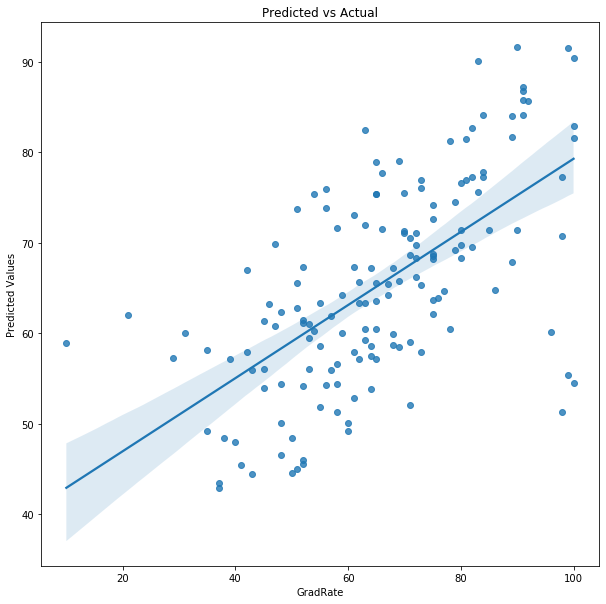

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Predicted vs Actual")
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
sns.regplot(x=y_test,y=y_pred,ax=ax)
plt.show()

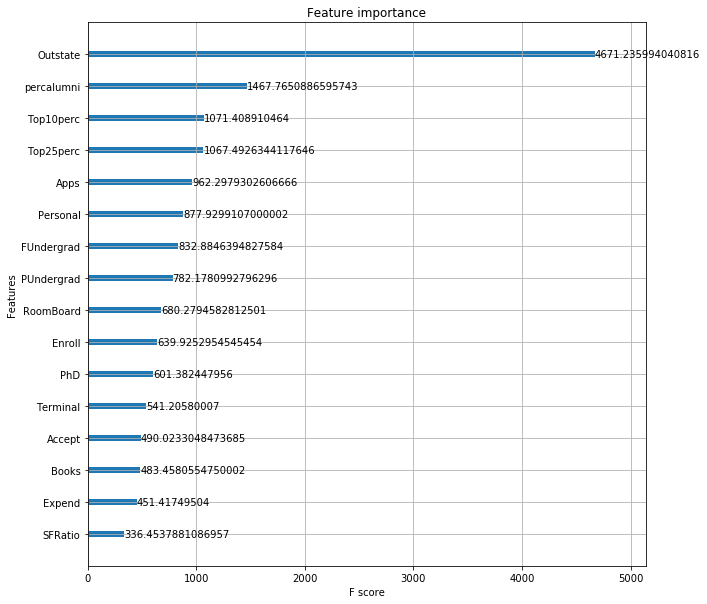

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgbmodel,ax=ax,importance_type='gain')
plt.show()

In [34]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is",mse)

Mean Squared Error is 186.08404908585382


In [35]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error is",rmse)

Root Mean Squared Error is 13.64126273795259


In [36]:
crossvalidate = cross_val_score(xgbmodel,X,y,scoring='neg_mean_squared_error',cv=5)

In [37]:
crossvalidate

array([-184.29254535, -194.7225908 , -237.02355858, -181.40333264,
       -161.21016881])

In [38]:
abs(crossvalidate)

array([184.29254535, 194.7225908 , 237.02355858, 181.40333264,
       161.21016881])

In [39]:
np.mean(abs(crossvalidate))

191.7304392367011

In [41]:
np.sqrt(np.mean(abs(crossvalidate)))

13.846676107886005

In [40]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

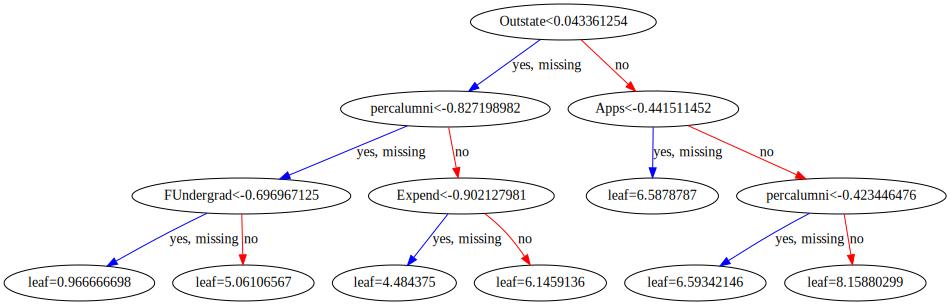

In [42]:
to_graphviz(xgbmodel)